In [2]:
source('packages.r')
load('/g/scb2/zeller/karcher/dysb_classif/data/siamcat/profiles_merged_with_metadata.rimage')

In [257]:
# Pairwise distances for PCoA
pwd <- vegdist(t(dataMetaAdaptedTruncWideAll), method = "canberra")

In [258]:
pwd <- as.matrix(pwd)

In [259]:
pcoa_o <- cmdscale(pwd, k = 2)

In [260]:
class(pcoa_o)

[1] "matrix"

In [261]:
pcoa_o <- as.data.frame(pcoa_o)

In [262]:
colnames(pcoa_o) <- c("PCo 1", "PCo 2")
pcoa_o$Sample_ID <- rownames(pcoa_o)

In [263]:
pcoa_o  %>% left_join(metaDataWGS %>%
                                                mutate(Sample_ID = rownames(.))) %>% filter(dataset == "Zhang_205_NatMed") %>% dim()


Joining, by = "Sample_ID"


[1] 232   6

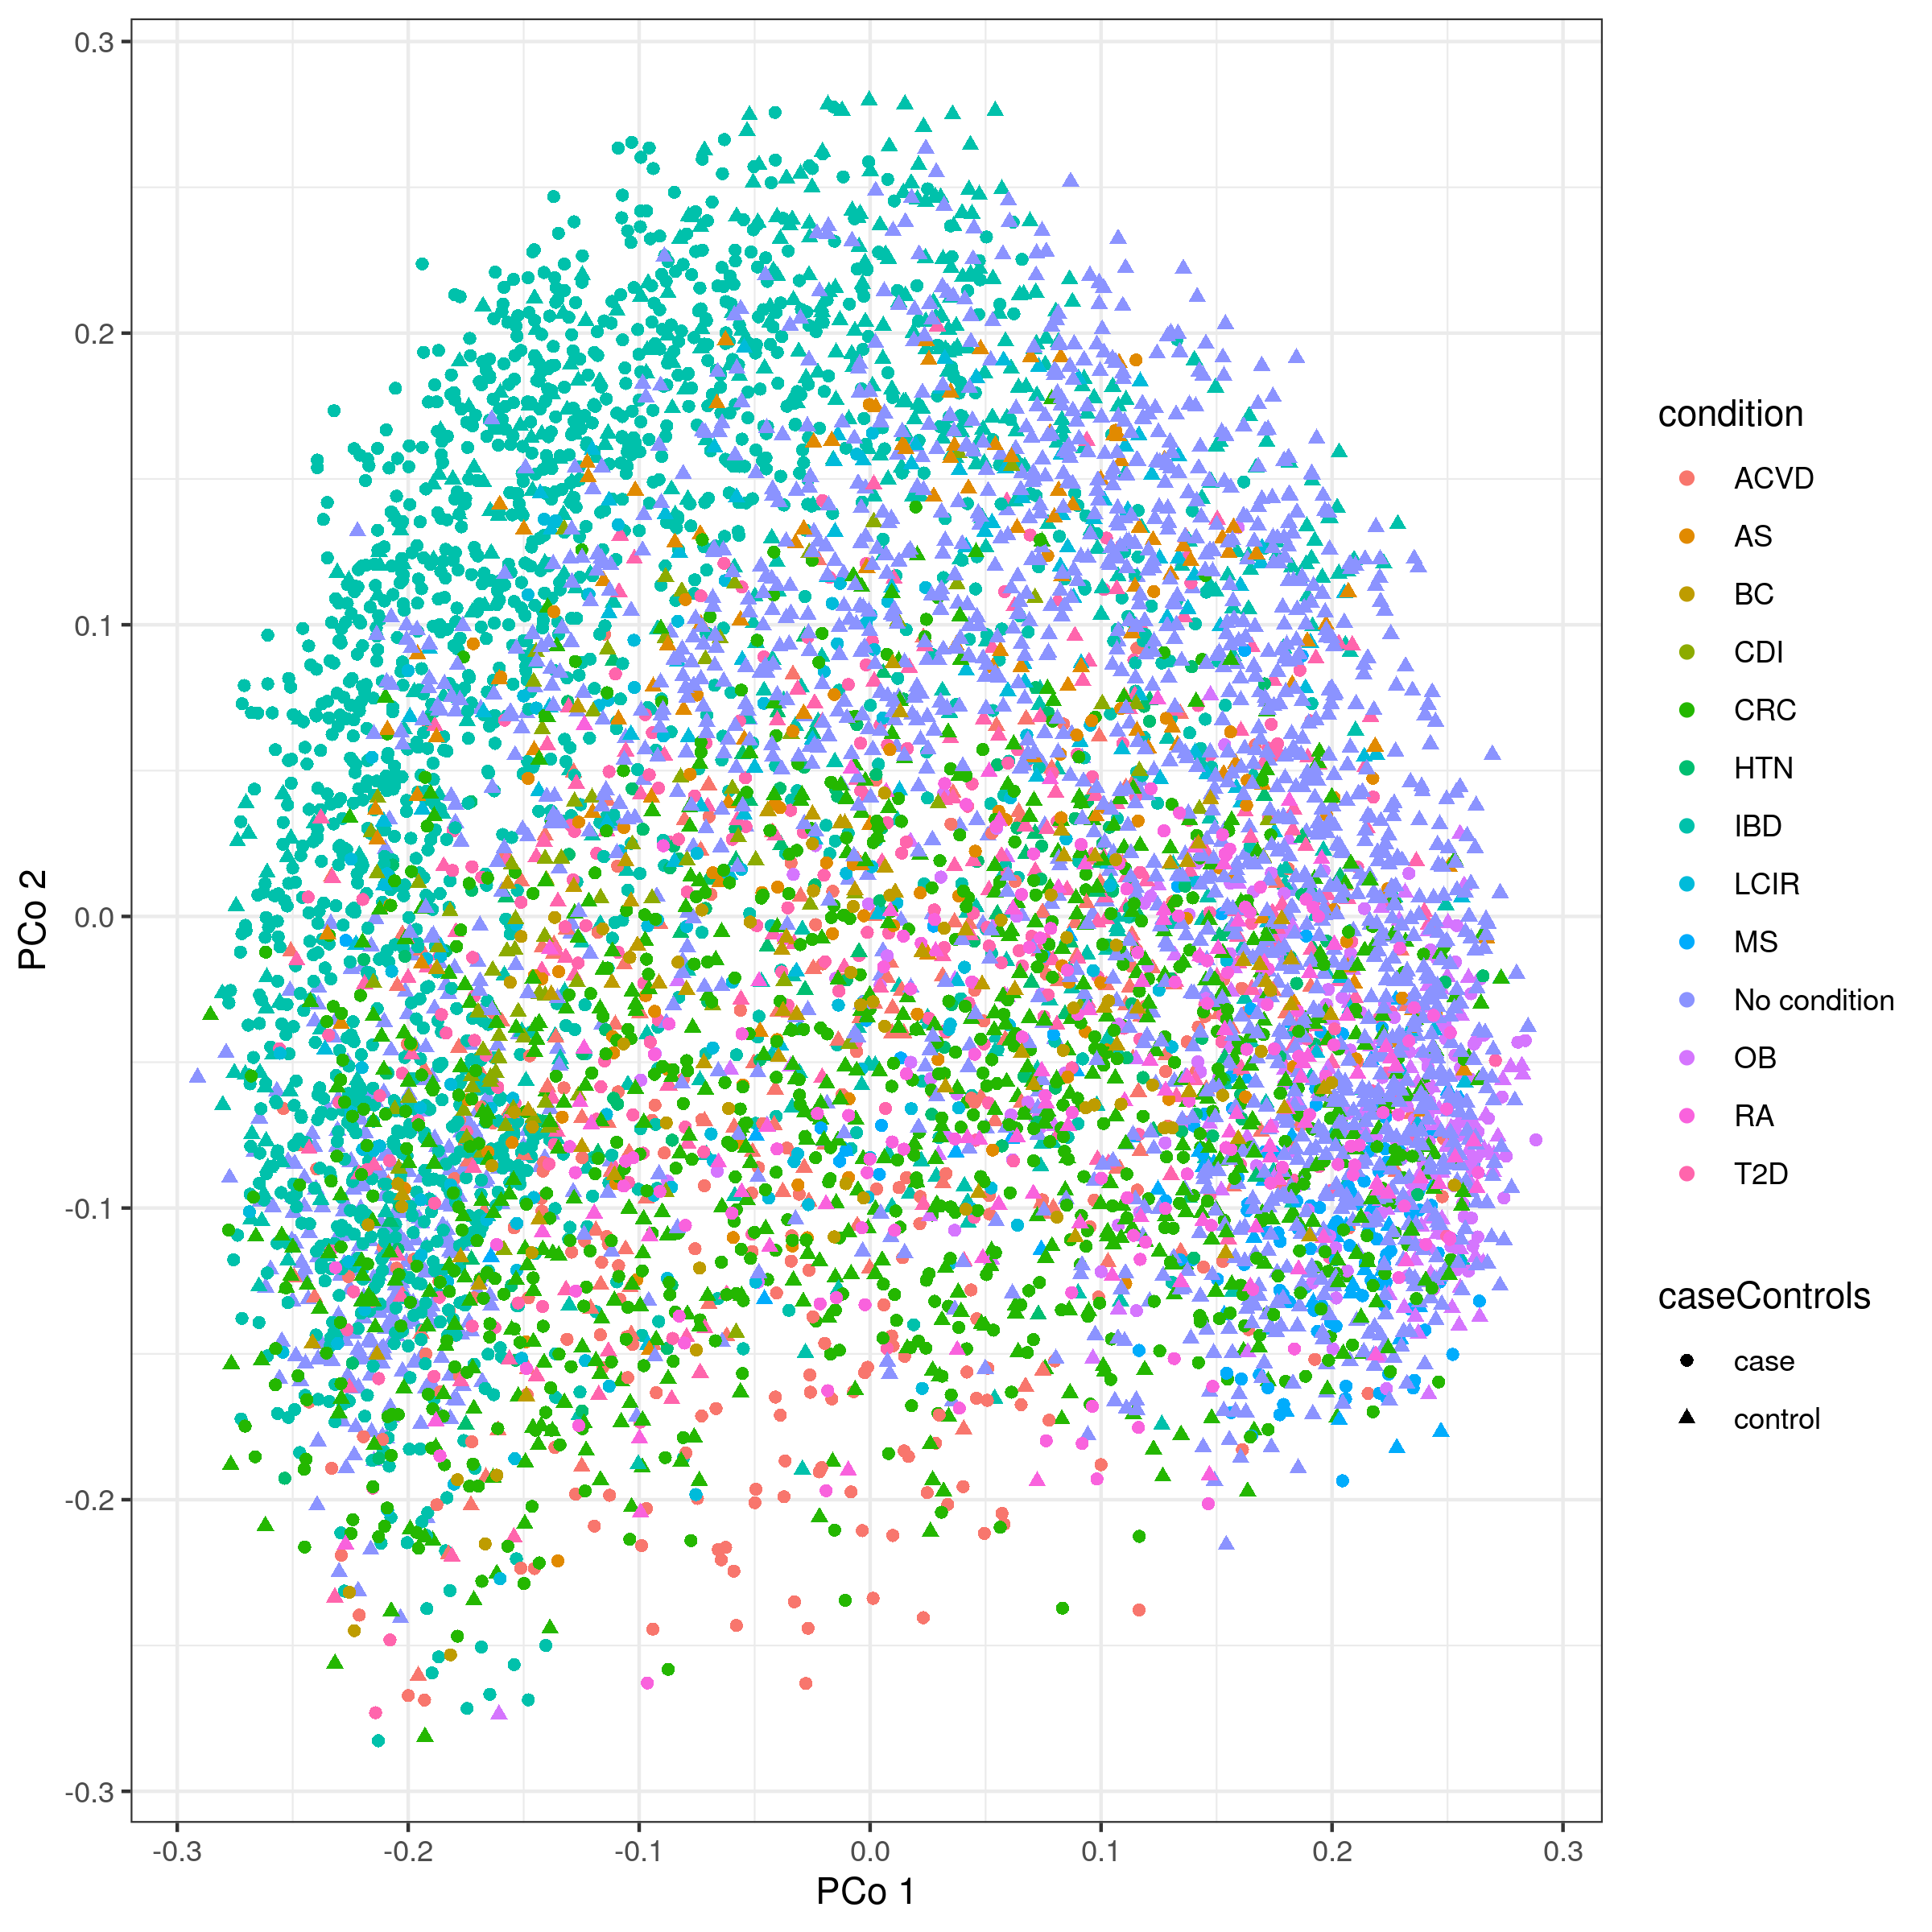

In [264]:
options(repr.plot.width = 8, repr.plot.height = 8, repr.plot.res = 300)
pcoa_o %>% 
as_tibble() %>%
left_join(metaDataWGS %>%
         mutate(Sample_ID = rownames(.)), by = 'Sample_ID') %>%
ggplot(aes(x = `PCo 1`, y = `PCo 2`, color = condition, shape = caseControls))  +
theme_bw() +
geom_point()